# Edges and contours
Edges are sets of pixels whose value changes remarkably along a particular orientation. The amount of change is represented by the first derivative of the intensity. Since the intensity is not a continuous function we must compute the derivative as the ratio of the difference between two pixel values along one direction, e.g. the horizontal direction $\vec{i}$, to the distance between the two pixels.

$$\frac{\Delta I(u)}{\Delta u} = \frac{I(u + 1) - I(u - 1)}{(u + 1) - (u - 1)} = \frac {I(u + 1) - I(u - 1)}{2}$$

We can do the same to compute the first derivative along the vertical direction $\vec{j}$ and define the image gradient 

$$\vec{\nabla} I(u, v) = \frac{\Delta I(u, v)}{\Delta u} \vec{i} + \frac{\Delta I(u, v)}{\Delta v} \vec{j}$$ 

The magnitude of the gradient is defined as 

$$|\nabla I(u, v)| = \sqrt{ \begin{pmatrix} \frac{\Delta I(u, v)}{\Delta u} \end{pmatrix}^2 + \begin{pmatrix} \frac{\Delta I(u, v)}{\Delta v} \end{pmatrix}^2 }$$

In [44]:
import numpy as np
import math
import skimage
from skimage import io
from skimage import filters
from skimage import util
import matplotlib as mpl
import matplotlib.pyplot as plt
from platform import python_version
print("python version: %s"%python_version())
print("numpy version: %s"%np.__version__)
#print("pandas version: %s"%pd.__version__)
print("skimage version: %s"%skimage.__version__)
print("matplotlib version: %s"%mpl.__version__)

python version: 3.8.2
numpy version: 1.18.1
skimage version: 0.17.2
matplotlib version: 3.3.1


## Gradient filter
We can represent the two components of the gradient with two linear filters

$$\vec{H_x} = \frac{1}{2} \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}$$


$$\vec{H_y} = \frac{1}{2} \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}$$

and the gradient with their tensor product (aka outer product)

$$H_x \otimes H_y = \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix} [-1, 0, 1] = \frac{1}{4} \begin{bmatrix} 1 & 0 & -1 \\ 0 & 0 & 0 \\ -1 & 0 & 1 \end{bmatrix} $$

In [2]:
Hx = np.array([-1, 0, 1])
Hy = np.array([-1, 0, 1])
np.outer(Hx, Hy)

array([[ 1,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

In [36]:
def dip_horizontalDerivative(image):
    # Computes the first horizontal derivative of the intensity 
    # at each pixel in the image. 
    rows = image.shape[0]
    cols = image.shape[1]
    Hx = np.array([-1, 0, 1])
    derived_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            h_derivative = 0
            for j in range(-1, 2):
                    v = image[row, col + j]  
                    h_derivative = h_derivative + (1 / 2) * v * Hx[j + 1]
            derived_img[row, col] = h_derivative
    
    return derived_img

In [37]:
def dip_verticalDerivative(image):
    # Computes the first vertical derivative of the intensity 
    # at each pixel in the image.
    rows = image.shape[0]
    cols = image.shape[1]
    Hy = np.array([-1, 0, 1])
    derived_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            v_derivative = 0
            for i in range(-1, 2):
                    v = image[row + i, col]  
                    v_derivative = v_derivative + (1 / 2) * v * Hy[i + 1]
            derived_img[row, col] = h_derivative
    
    return derived_img

## A simple edge operator: the gradient filter
The local gradient can be used to detect edges and can be easily computed from the horizontal and vertical first derivatives.

In [35]:
def dip_localGradient(image):
    # Computes the local gradient of the intensity 
    # at each pixel as the square root of the sum of the
    # squares of the horizontal and vertical derivatives
    rows = image.shape[0]
    cols = image.shape[1]
    Hx = np.array([-1, 0, 1])
    Hy = np.array([-1, 0, 1])
    derived_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            v_derivative = 0
            # vertical derivative
            for i in range(-1, 2):
                    v = image[row + i, col]  
                    v_derivative = v_derivative + (1 / 2) * v * Hy[i + 1]
            h_derivative = 0
            # horizontal derivative
            for j in range(-1, 2):
                    v = image[row, col + j]  
                    h_derivative = h_derivative + (1 / 2) * v * Hx[j + 1]
            
            derived_img[row, col] = math.sqrt(h_derivative * h_derivative + v_derivative * v_derivative)  
    
    return derived_img

In [9]:
orig_img = skimage.data.camera()
derived_img = dip_localGradient(orig_img)

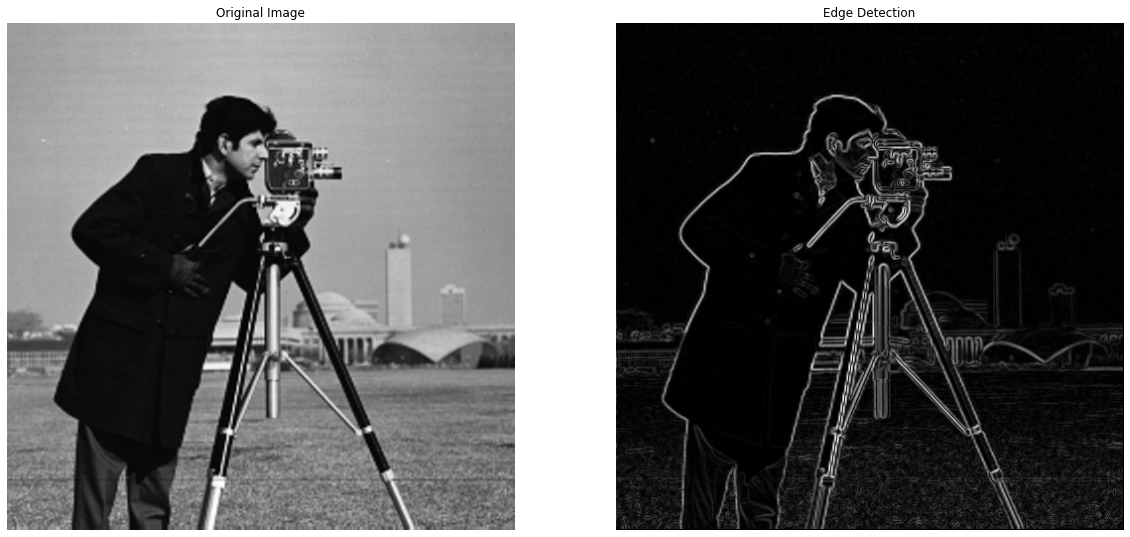

In [15]:
original_img = skimage.data.camera()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[0].imshow(orig_img, cmap='gray')
axes[1].set_title('Edge Detection')
axes[1].set_axis_off()
axes[1].imshow(derived_img, cmap='gray')

Another example

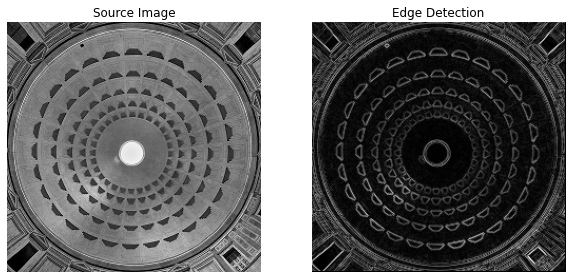

In [14]:
pantheon_img = io.imread('images/pantheon.png')[:,:,0]
pantheon_grad = dip_localGradient(pantheon_img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(pantheon_img, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Edge Detection')
axes[1].imshow(pantheon_grad, cmap='gray')
#plt.savefig('pantheon_grad.png')

Now an example of gradient based edge detection using a satellite image (Copernicus Sentinel 2)

In [57]:
sentinel2_img = io.imread('images/sentinel2-rome.png')[:,:,0]
sentinel2_grad = dip_localGradient(sentinel2_img) * 2

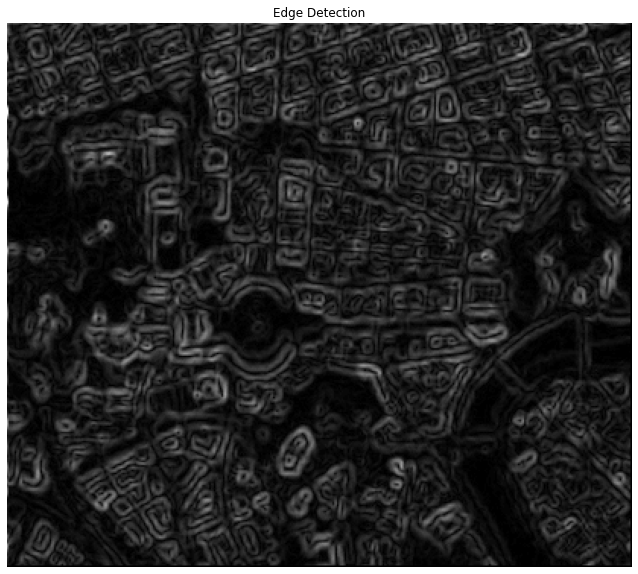

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.set_axis_off()
ax.set_title('Edge Detection')
ax.imshow(sentinel2_grad, cmap='gray')
#plt.savefig('sentinel2_grad.png')

## The Sobel operator

In [52]:
def dip_operatorSobel(image):
    # Computes the Sobel gradient of the intensity 
    # at each pixel as the square root of the sum of the
    # squares of the horizontal and vertical derivatives
    rows = image.shape[0]
    cols = image.shape[1]
    Hx = np.array(((-1, 0, 1), (-2, 0, 2), (-1, 0, 1))) # Sobel horizontal derivative
    Hy = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1))) # Sobel vertical derivative
    derived_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            h_derivative = 0
            v_derivative = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j]  
                    v_derivative = v_derivative + v * Hy[i + 1, j + 1]
                    h_derivative = h_derivative + v * Hx[i + 1, j + 1]
            
            derived_img[row, col] = (1 / 8) * math.sqrt(h_derivative * h_derivative + v_derivative * v_derivative)  
    
    return derived_img

In [61]:
sentinel2_sobel = util.invert(dip_operatorSobel(sentinel2_img))

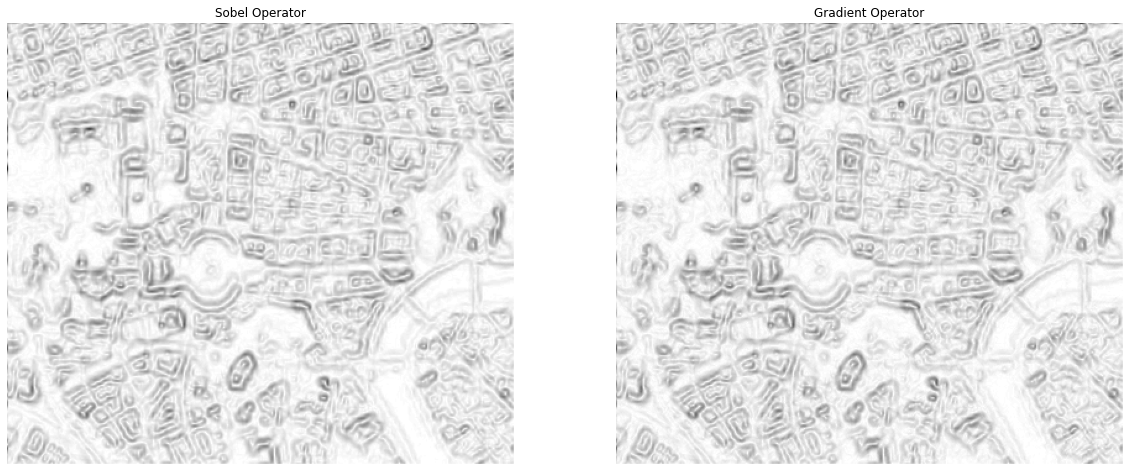

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Sobel Operator')
axes[0].set_axis_off()
axes[0].imshow(sentinel2_sobel, cmap='gray')
axes[1].set_title('Gradient Operator')
axes[1].set_axis_off()
axes[1].imshow(util.invert(sentinel2_grad), cmap='gray')